In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

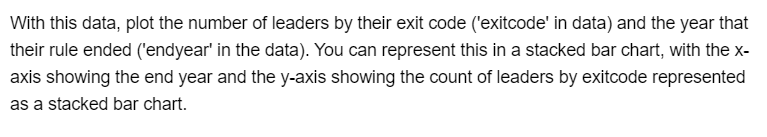

In [3]:
from IPython.display import Image
Image(filename='F:\\Documents\\Day python tutorial\\Questions\\Aug_11_2021_Questions.png')

In [4]:
df = pd.read_table("1March_Archigos_4.1.txt")
df.head()

,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,...,yrdied,borndate,deathdate,dbpedia.uri,num.entry,num.exit,num.exitcode,num.posttenurefate,fties,ftcur
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1877-03-04,Regular,Regular,Regular,...,1885,NaN,1885-07-23,http://dbpedia.org/resource/Ulysses_S._Grant,0,1.0,0,0.0,NaN,NaN
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1881-03-04,Regular,Regular,Regular,...,1893,NaN,1893-01-17,http://dbpedia.org/resource/Rutherford_B._Hayes,0,1.0,0,0.0,NaN,NaN
2,USA-1881-1,81dcf24a-1e42-11e4-b4cd-db5882bf8def,2,USA,Garfield,1881-03-04,1881-09-19,Regular,Irregular,Assassination by Unsupported Individual,...,1881,NaN,1881-09-19,http://dbpedia.org/resource/James_A._Garfield,0,3.0,11,3.0,NaN,NaN
3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1885-03-04,Regular,Regular,Regular,...,1886,NaN,1886-11-18,http://dbpedia.org/resource/Chester_A._Arthur,0,1.0,0,0.0,NaN,NaN
4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1889-03-04,Regular,Regular,Regular,...,1908,NaN,1908-06-24,http://dbpedia.org/resource/Grover_Cleveland,0,1.0,0,0.0,NaN,NaN


In [5]:
df.drop(
    columns=['leadid','ccode','entry','prevtimesinoffice','posttenurefate',
    'yrborn','yrdied','borndate','deathdate','dbpedia.uri','num.entry','num.exit','num.exitcode','num.posttenurefate','fties','ftcur'],
    inplace=True
)

In [6]:
df

,obsid,idacr,leader,startdate,enddate,exit,exitcode,gender
0,USA-1869,USA,Grant,1869-03-04,1877-03-04,Regular,Regular,M
1,USA-1877,USA,Hayes,1877-03-04,1881-03-04,Regular,Regular,M
2,USA-1881-1,USA,Garfield,1881-03-04,1881-09-19,Irregular,Assassination by Unsupported Individual,M
3,USA-1881-2,USA,Arthur,1881-09-19,1885-03-04,Regular,Regular,M
4,USA-1885,USA,Cleveland,1885-03-04,1889-03-04,Regular,Regular,M
...,...,...,...,...,...,...,...,...
3404,FJI-2000-1,FJI,Ratu Josefa Iloilo,2000-05-27,2000-05-29,Regular,Regular,M
3405,FJI-2000-2,FJI,Bainimarama,2000-05-29,2000-07-14,Irregular,"Removed by Other Government Actors, without Fo...",M
3406,FJI-2000-3,FJI,Laisenia Qarase,2000-07-14,2006-12-05,Irregular,"Removed by Military, without Foreign Support",M
3407,FJI-2006,FJI,Senilagakali,2006-12-05,2007-01-05,Regular,Regular,M


In [7]:
df['enddate'] = pd.to_datetime(df['enddate'])
custom1 = df.groupby([pd.Grouper(key='enddate',freq='Y'),'exitcode']).count().reset_index()
custom1

,enddate,exitcode,obsid,idacr,leader,startdate,exit,gender
0,1871-12-31,Removed through Threat of Foreign Force,1,1,1,1,1,1
1,1875-12-31,Regular,7,7,7,7,7,7
2,1875-12-31,Unknown,2,2,2,2,2,2
3,1876-12-31,Regular,11,11,11,11,11,11
4,1876-12-31,"Removed by Military, without Foreign Support",2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
450,2014-12-31,"Removed by Military, with Foreign Support",1,1,1,1,1,1
451,2014-12-31,"Removed by Military, without Foreign Support",1,1,1,1,1,1
452,2014-12-31,Still in Office,3,3,3,3,3,3
453,2015-12-31,Regular,27,27,27,27,27,27


In [8]:
custom1['Year'] = custom1['enddate'].dt.year
custom1['enddate'] = custom1['enddate'].map(lambda x: datetime.strftime(x,'%Y'))
custom1.drop([454,452],inplace=True)

In [9]:
custom1

,enddate,exitcode,obsid,idacr,leader,startdate,exit,gender,Year
0,1871,Removed through Threat of Foreign Force,1,1,1,1,1,1,1871
1,1875,Regular,7,7,7,7,7,7,1875
2,1875,Unknown,2,2,2,2,2,2,1875
3,1876,Regular,11,11,11,11,11,11,1876
4,1876,"Removed by Military, without Foreign Support",2,2,2,2,2,2,1876
...,...,...,...,...,...,...,...,...,...
448,2013,"Removed by Rebels, without Foreign Support",1,1,1,1,1,1,2013
449,2014,Regular,42,42,42,42,42,42,2014
450,2014,"Removed by Military, with Foreign Support",1,1,1,1,1,1,2014
451,2014,"Removed by Military, without Foreign Support",1,1,1,1,1,1,2014


In [63]:
fig = px.bar(
    custom1, x='enddate', y='obsid',labels={'obsid':'Number of Leaders','enddate':'Year'},
    hover_name='exitcode',
    color='exitcode',
    text='obsid',
    title='Leaders on Exits (without in-office)'
)

fig.update_layout(
    height=650,
    margin=dict(l=60, r=20, t=60, b=20),
    paper_bgcolor="lightgrey",
    legend=dict(orientation='h',yanchor="top", y=-.09, xanchor="center",x=.5),
    legend_title_text='Exit Status'
)
fig